# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction.

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

class_names = ['airplaine', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 10s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

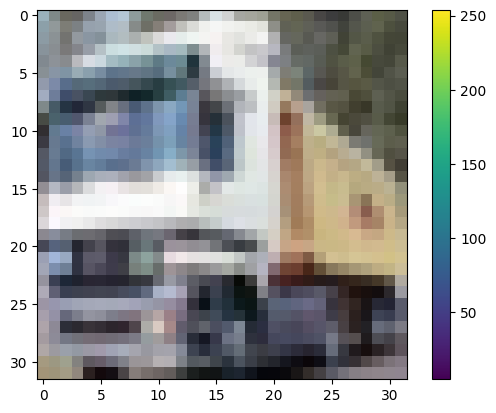

In [2]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

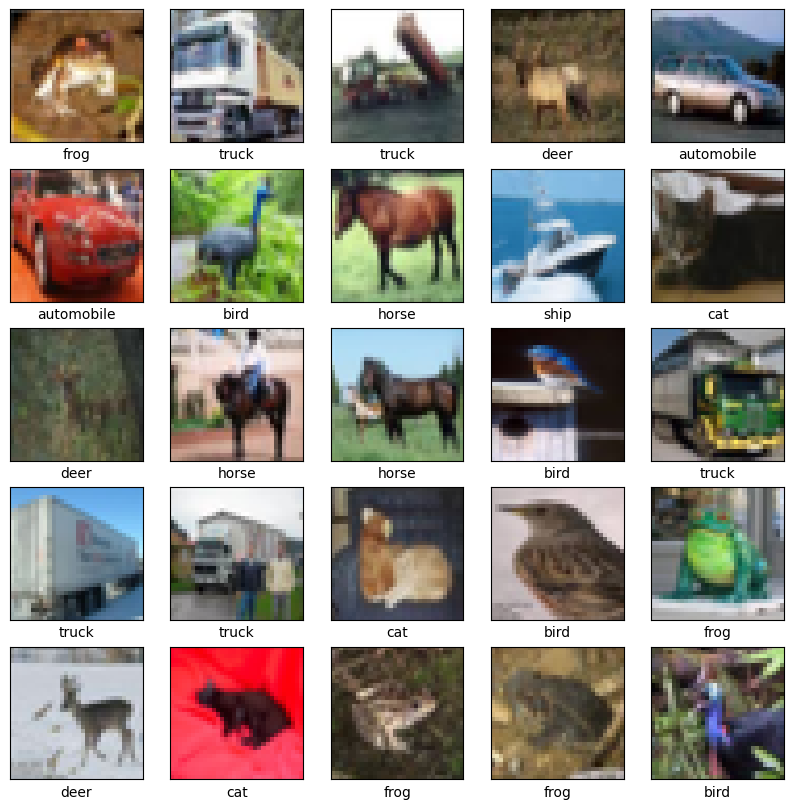

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [35]:
model = keras.Sequential([
    keras.layers.Conv2D(32,3, activation='relu', input_shape=(32, 32, 3)),

    keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    #keras.layers.Conv2D(32,3, activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    #keras.layers.Conv2D(32,3, activation='relu'),
    #keras.layers.Conv2D(32,3, activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=(1,1), strides=(1,1)),

    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),

    keras.layers.Dense(1000, activation='relu'),

    keras.layers.Dense(10, activation='softmax'),

])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=3)

In [34]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=96, input_shape=(x_train.shape[1:]), kernel_size=(3,3), strides=(4,4), activation='relu', padding="valid"),

    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"),

    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"),

    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="valid"),

    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"),

    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),

    keras.layers.Dense(1000, activation='relu'),

    keras.layers.Dense(10, activation='softmax'),

])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=3)

ValueError: ignored

In [41]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2930 - accuracy: 0.5486
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1200 - accuracy: 0.6094
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0060 - accuracy: 0.6521
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9135 - accuracy: 0.6842
Epoch 5/20
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8452 - accuracy: 0.7130
Epoch 6/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7625 - accuracy: 0.7410
Epoch 7/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6981 - accuracy: 0.7691
Epoch 8/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6276 - accuracy: 0.7919
Epoch 9/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5829 - accuracy: 0.8122
Epoch 10/20
1563/1563 [==============================] - 18s 11m

In [44]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 2.8371 - accuracy: 0.5973 - 990ms/epoch - 3ms/step

Test accuracy: 0.5972999930381775


In [45]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [46]:
np.argmax(predictions[0])

7

In [47]:
np.argmax(y_test[0])

3

In [48]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

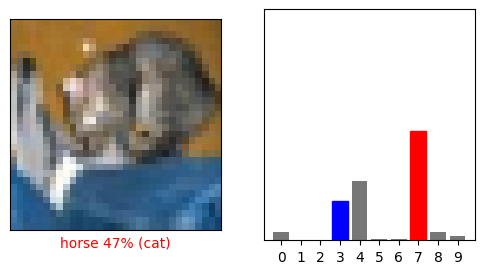

In [49]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

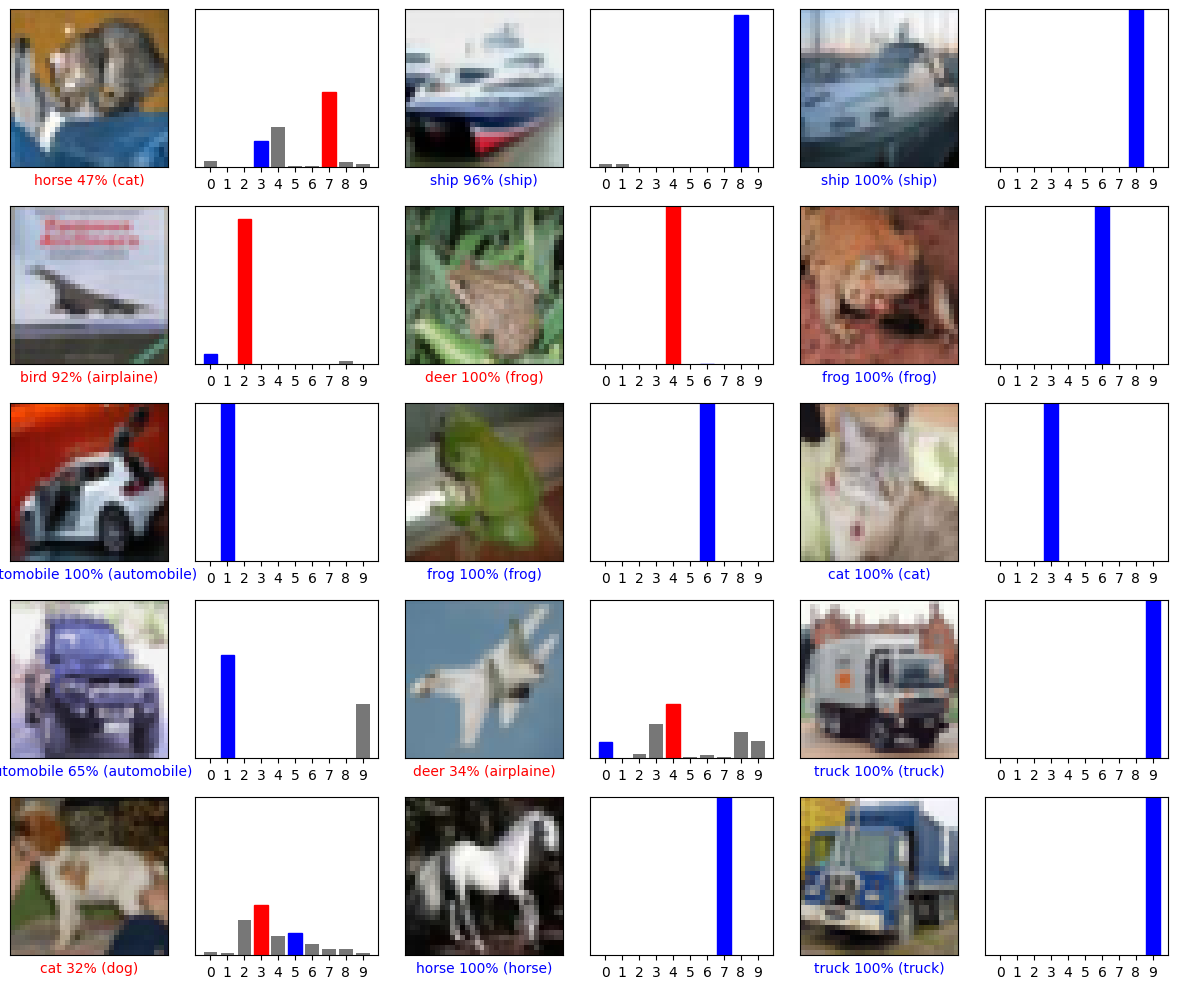

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()